In [48]:
!pip install tensorflow

In [2]:
!pip install opencv-python

In [3]:
!pip install matplotlib

In [4]:
#checking if the dependencies are installed properly
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [5]:
import tensorflow as tf
import os

In [6]:
import cv2

In [7]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [8]:
data_dir = 'newdataset'

In [9]:
os.listdir(data_dir)

['Closed', 'Open']

In [16]:
import numpy as np

In [10]:
cv2.imread(os.path.join('DataSet','Open','_0.jpg'))

In [13]:
img = cv2.imread(os.path.join('DataSet','Open','_0.jpg'))

In [14]:
from matplotlib import pyplot as plt

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data = tf.keras.utils.image_dataset_from_directory('newdataset')

Found 1452 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
data_iterator

In [21]:
batch = data_iterator.next()

In [22]:
batch

(array([[[[166.6088  , 157.6088  , 158.6088  ],
          [161.9478  , 155.88335 , 157.86186 ],
          [161.68217 , 155.68217 , 158.83546 ],
          ...,
          [ 67.223724,  39.148026,  30.517166],
          [ 76.2897  ,  43.26822 ,  34.26822 ],
          [ 95.87521 ,  60.02745 ,  50.969543]],
 
         [[159.15224 , 150.41005 , 150.63661 ],
          [160.7783  , 153.96257 , 155.6722  ],
          [166.69762 , 160.41211 , 161.99165 ],
          ...,
          [ 76.37039 ,  49.31038 ,  39.906082],
          [ 73.3304  ,  41.071274,  31.819   ],
          [ 84.12273 ,  50.55426 ,  40.70671 ]],
 
         [[163.24846 , 155.24846 , 153.24846 ],
          [163.42365 , 154.44513 , 155.38068 ],
          [166.2719  , 158.35126 , 158.99147 ],
          ...,
          [ 75.84282 ,  51.753387,  39.69284 ],
          [ 61.292435,  32.535507,  22.118073],
          [ 72.98976 ,  42.52249 ,  31.604996]],
 
         ...,
 
         [[113.185135,  99.03273 ,  75.35014 ],
          [102.735

In [23]:
len(batch)

2

In [24]:
batch[1]

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

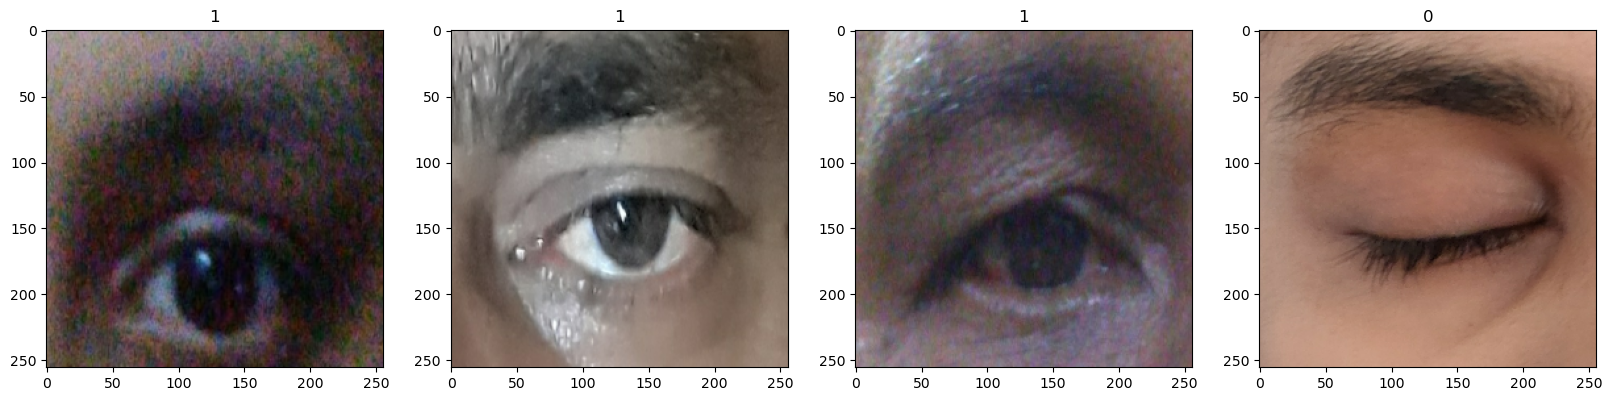

In [27]:
#checking which class is assigned to which image
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [28]:
# open eyes class = 1
# closed eyes class = 0


Deep Model

In [29]:
len(data)

46

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [31]:
test_size

4

In [32]:
train_size

32

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Deep Model 

building deep learning model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [35]:
model = Sequential()


In [36]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [39]:
logdir='log'


In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [41]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
32/32 [==============================] - 23s 640ms/step - loss: 49.6923 - accuracy: 0.7158 - val_loss: 0.3154 - val_accuracy: 0.8750
Epoch 2/20
32/32 [==============================] - 22s 675ms/step - loss: 0.2773 - accuracy: 0.9180 - val_loss: 0.2092 - val_accuracy: 0.9375
Epoch 3/20
32/32 [==============================] - 21s 648ms/step - loss: 0.3514 - accuracy: 0.8965 - val_loss: 0.3859 - val_accuracy: 0.8854
Epoch 4/20
32/32 [==============================] - 22s 682ms/step - loss: 0.2204 - accuracy: 0.9326 - val_loss: 0.2822 - val_accuracy: 0.9271
Epoch 5/20
32/32 [==============================] - 23s 728ms/step - loss: 0.1669 - accuracy: 0.9570 - val_loss: 0.1674 - val_accuracy: 0.9444
Epoch 6/20
32/32 [==============================] - 23s 718ms/step - loss: 0.0847 - accuracy: 0.9746 - val_loss: 0.1337 - val_accuracy: 0.9653
Epoch 7/20
32/32 [==============================] - 22s 672ms/step - loss: 0.0543 - accuracy: 0.9844 - val_loss: 0.1070 - val_accuracy: 0.972

plot performance

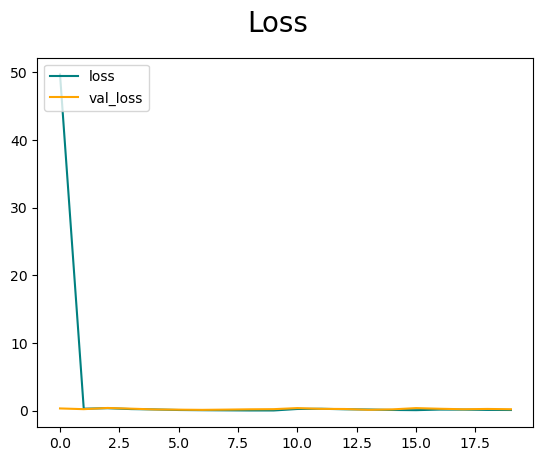

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

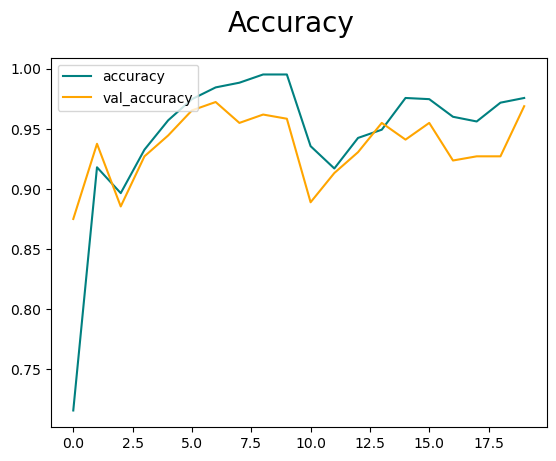

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [45]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 198ms/step


In [47]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.95384616, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32) tf.Tensor(0.9609375, shape=(), dtype=float32)


Test

In [49]:
import cv2


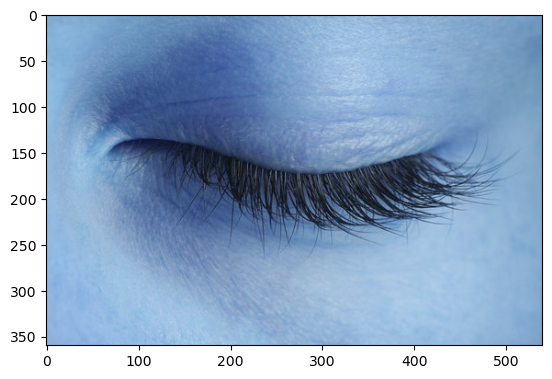

In [51]:
img = cv2.imread('ing.jpg')
plt.imshow(img)
plt.show()

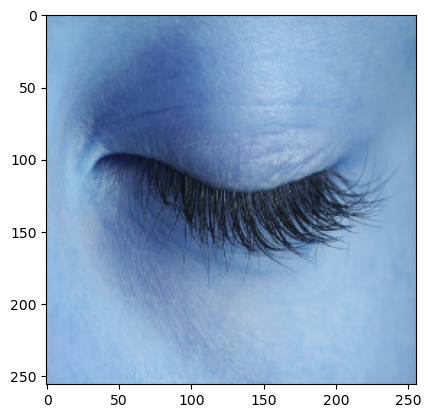

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 264ms/step


In [54]:
yhat

array([[0.18010636]], dtype=float32)

In [56]:
if yhat > 0.5: 
    print(f'Predicted class is awake')
else:
    print(f'Predicted class is sleep')

Predicted class is sleep
